In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import norm
from scipy import stats
import statsmodels.api as sm
import os

### Regressão Múltipla

In [2]:
os.chdir('/Users/leonardofaverobocardi/Documents/GitHub/Python_Bootcamp/Módulo 02/db')
hbat = pd.read_csv('HBAT.csv')

In [3]:
xx = pd.DataFrame(hbat.iloc[:,10:21])
xx.corr() # avalia a menor correlacao para a variavel dependente x19 --> r = [-1,1]

,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
x9,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.059401,0.756869,0.394506,0.865092,0.603263
x10,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.084166,0.184236,0.333555,0.275863,0.304669
x11,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.046164,0.424408,-0.377967,0.601850,0.550546
x12,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.031640,0.195127,0.352241,0.271551,0.500205
x13,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,0.023163,-0.114567,0.471110,-0.072872,-0.208296
x14,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.035199,0.197065,-0.170253,0.109395,0.177545
x15,0.059401,0.084166,0.046164,0.031640,0.023163,0.035199,1.000000,0.068539,0.094131,0.105749,0.070898
x16,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,0.068539,1.000000,0.406968,0.751003,0.521732
x17,0.394506,0.333555,-0.377967,0.352241,0.471110,-0.170253,0.094131,0.406968,1.000000,0.496695,0.055953
x18,0.865092,0.275863,0.601850,0.271551,-0.072872,0.109395,0.105749,0.751003,0.496695,1.000000,0.577042


In [4]:
# independente
arr = ['x9','x10','x11','x12','x13','x14','x15','x16','x17','x18']
X = hbat[arr]

# dependente
y = hbat['x19']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

/Users/leonardofaverobocardi/anaconda3/anaconda3/envs/python3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    x19   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     16.98
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           9.32e-17
Time:                        12:07:18   Log-Likelihood:                -105.58
No. Observations:                 100   AIC:                             233.2
Df Residuals:                      89   BIC:                             261.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0075      1.296      1.550      0.125      -0.567       4.582
x9             0.2708      0.132      2.053      0.043       0.009       0.533
x10            0.0202      0.081      0.249      0.804      -0.141       0.181
x11            0.2459      0.342      0.719      0.474      -0.434       0.926
x12            0.5622      0.090      6.228      0.000       0.383       0.742
x13           -0.0739      0.062     -1.189      0.238      -0.197       0.050
x14           -0.1120      0.099     -1.136      0.259      -0.308       0.084
x15            0.0280      0.051      0.555      0.580      -0.072       0.128
x16            0.2371      0.131      1.804      0.075      -0.024       0.498
x17           -0.1672      0.348     -0.481      0.632      -0.858       0.524
x18           -0.0381      0.663     -0.057      0.954      -1.355       1.279
==============================================================================
Omnibus:                        3.312   Durbin-Watson:                   2.341
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.548
Skew:                          -0.251   Prob(JB):                        0.280
Kurtosis:                       2.400   Cond. No.                         324.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# independente
arr = ['x9','x10','x11','x12','x13','x14','x16','x18']
X = hbat[arr]

# dependente
y = hbat['x19']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    x19   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     21.52
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           5.38e-18
Time:                        12:07:18   Log-Likelihood:                -105.85
No. Observations:                 100   AIC:                             229.7
Df Residuals:                      91   BIC:                             253.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6522      0.877      1.884      0.063      -0.089       3.394
x9             0.2600      0.130      2.004      0.048       0.002       0.518
x10            0.0172      0.079      0.216      0.829      -0.141       0.175
x11            0.4044      0.089      4.523      0.000       0.227       0.582
x12            0.5695      0.087      6.510      0.000       0.396       0.743
x13           -0.0800      0.060     -1.335      0.185      -0.199       0.039
x14           -0.1108      0.098     -1.134      0.260      -0.305       0.083
x16            0.2350      0.130      1.804      0.075      -0.024       0.494
x18           -0.3245      0.239     -1.361      0.177      -0.798       0.149
==============================================================================
Omnibus:                        3.075   Durbin-Watson:                   2.310
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.387
Skew:                          -0.237   Prob(JB):                        0.303
Kurtosis:                       2.410   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# independente
arr = ['x9','x10','x11','x12','x16','x18']
X = hbat[arr]

# dependente
y = hbat['x19']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    x19   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     28.02
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           6.96e-19
Time:                        12:07:18   Log-Likelihood:                -107.33
No. Observations:                 100   AIC:                             228.7
Df Residuals:                      93   BIC:                             246.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4899      0.526      0.932      0.354      -0.554       1.534
x9             0.2699      0.130      2.075      0.041       0.012       0.528
x10            0.0266      0.080      0.334      0.739      -0.132       0.185
x11            0.4392      0.075      5.894      0.000       0.291       0.587
x12            0.5324      0.085      6.274      0.000       0.364       0.701
x16            0.2272      0.128      1.779      0.079      -0.026       0.481
x18           -0.3592      0.229     -1.570      0.120      -0.814       0.095
==============================================================================
Omnibus:                        2.252   Durbin-Watson:                   2.357
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                1.824
Skew:                          -0.182   Prob(JB):                        0.402
Kurtosis:                       2.448   Cond. No.                         86.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# independente
arr = ['x9','x11','x12','x16','x18']
X = hbat[arr]

# dependente
y = hbat['x19']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    x19   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     33.92
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           1.19e-19
Time:                        12:07:18   Log-Likelihood:                -107.39
No. Observations:                 100   AIC:                             226.8
Df Residuals:                      94   BIC:                             242.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5086      0.520      0.978      0.331      -0.524       1.541
x9             0.2666      0.129      2.066      0.042       0.010       0.523
x11            0.4368      0.074      5.917      0.000       0.290       0.583
x12            0.5457      0.074      7.330      0.000       0.398       0.694
x16            0.2267      0.127      1.783      0.078      -0.026       0.479
x18           -0.3456      0.224     -1.542      0.126      -0.791       0.099
==============================================================================
Omnibus:                        2.254   Durbin-Watson:                   2.348
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                1.818
Skew:                          -0.180   Prob(JB):                        0.403
Kurtosis:                       2.446   Cond. No.                         80.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# independente
arr = ['x9','x11','x12','x18']
X = hbat[arr]

# dependente
y = hbat['x19']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    x19   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     40.67
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           8.08e-20
Time:                        12:07:18   Log-Likelihood:                -109.05
No. Observations:                 100   AIC:                             228.1
Df Residuals:                      95   BIC:                             241.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6881      0.516      1.333      0.186      -0.336       1.713
x9             0.3430      0.123      2.785      0.006       0.099       0.588
x11            0.4239      0.074      5.705      0.000       0.276       0.571
x12            0.5405      0.075      7.183      0.000       0.391       0.690
x18           -0.2231      0.216     -1.034      0.304      -0.651       0.205
==============================================================================
Omnibus:                        2.434   Durbin-Watson:                   2.383
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.215
Skew:                          -0.270   Prob(JB):                        0.330
Kurtosis:                       2.511   Cond. No.                         73.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# independente
arr = ['x9','x11','x12']
X = hbat[arr]

# dependente
y = hbat['x19']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    x19   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     53.83
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           1.70e-20
Time:                        12:07:18   Log-Likelihood:                -109.61
No. Observations:                 100   AIC:                             227.2
Df Residuals:                      96   BIC:                             237.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5941      0.508      1.169      0.245      -0.415       1.603
x9             0.2448      0.078      3.123      0.002       0.089       0.400
x11            0.3987      0.070      5.678      0.000       0.259       0.538
x12            0.5226      0.073      7.135      0.000       0.377       0.668
==============================================================================
Omnibus:                        2.340   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                2.245
Skew:                          -0.294   Prob(JB):                        0.325
Kurtosis:                       2.560   Cond. No.                         66.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Leave-One-Out (LOO)

In [10]:
#stats.ttest_1samp(mae_demais,const_mae)

# Análise de Variância (ANOVA)

In [11]:
hbat.head()
#dados categoricos nas colunas x1 a x5

,Unnamed: 0,id,x1,x2,x3,x4,x5,x6,x7,x8,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,1,1,1 to 5 years,Magazine industry,Large (500+),Outside North America,Direct to customer,8.5,3.9,2.5,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,"Yes, would consider"
1,2,2,Over 5 years,Newsprint industry,Small (0 to 499),USA/North America,Indirect through broker,8.2,2.7,5.1,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,"No, would not consider"
2,3,3,Over 5 years,Magazine industry,Large (500+),Outside North America,Direct to customer,9.2,3.4,5.6,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,"Yes, would consider"
3,4,4,Less than 1 year,Newsprint industry,Large (500+),Outside North America,Indirect through broker,6.4,3.3,7.0,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,"No, would not consider"
4,5,5,1 to 5 years,Magazine industry,Large (500+),USA/North America,Direct to customer,9,3.4,5.2,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,"No, would not consider"


In [12]:
hbat['x1'] = hbat['x1'].astype('category')
hbat['x1_cat'] = hbat['x1'].cat.codes
f, p = stats.f_oneway(hbat['x19'], hbat['x1_cat'])

print('One-Way ANOVA')
print('=============')
print('F value:',f)
print('p value:',p,'\n')

One-Way ANOVA
F value: 1673.5053071227683
p value: 1.5849777056859617e-98 



In [13]:
from statsmodels.formula.api import ols
model = ols('x19 ~ C(x1_cat)',hbat).fit()
res = sm.stats.anova_lm(model,typ=2)
res

,sum_sq,df,F,PR(>F)
C(x1_cat),68.942925,2.0,46.645002,6.408468e-15
Residual,71.684675,97.0,NaN,NaN


## Teste de comparação múltipla (quando a análise de H0 da ANOVA é rejeitada)

### Teste de Tukey

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(hbat['x19'], hbat['x1_cat'])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.5893  0.001 -2.0898 -1.0888   True
     0      2   0.3403 0.2377 -0.1563  0.8368  False
     1      2   1.9295  0.001  1.4219  2.4372   True
----------------------------------------------------
[0 1 2]


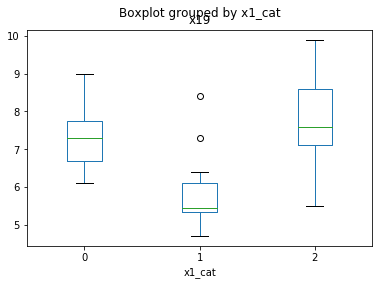

In [15]:
hbat.boxplot(column='x19', by='x1_cat', grid=False)
plt.show()

### x20 ~ C(x1_cat)

In [16]:
hbat['x1'] = hbat['x1'].astype('category')
hbat['x1_cat'] = hbat['x1'].cat.codes
f, p = stats.f_oneway(hbat['x20'], hbat['x1_cat'])

print('One-Way ANOVA')
print('=============')
print('F value:',f)
print('p value:',p,'\n')

One-Way ANOVA
F value: 2055.3598907352575
p value: 1.6309849195000433e-106 



In [17]:
mc = MultiComparison(hbat['x20'], hbat['x1_cat'])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.0367  0.001 -1.5338 -0.5396   True
     0      2   0.4339 0.0963 -0.0593   0.927  False
     1      2   1.4705  0.001  0.9663  1.9748   True
----------------------------------------------------
[0 1 2]


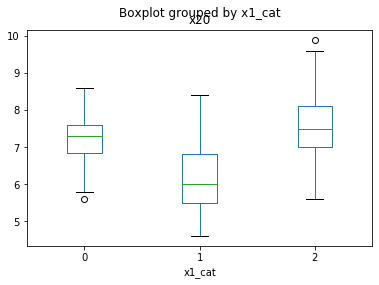

In [18]:
hbat.boxplot(column='x20', by='x1_cat', grid=False)
plt.show()

### x21 ~ C(x1_cat)

In [19]:
hbat['x1'] = hbat['x1'].astype('category')
hbat['x1_cat'] = hbat['x1'].cat.codes
f, p = stats.f_oneway(hbat['x21'], hbat['x1_cat'])

print('One-Way ANOVA')
print('=============')
print('F value:',f)
print('p value:',p,'\n')

One-Way ANOVA
F value: 2900.8504199062486
p value: 3.222862370770407e-120 



In [20]:
mc = MultiComparison(hbat['x20'], hbat['x1_cat'])
result = mc.tukeyhsd()

print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.0367  0.001 -1.5338 -0.5396   True
     0      2   0.4339 0.0963 -0.0593   0.927  False
     1      2   1.4705  0.001  0.9663  1.9748   True
----------------------------------------------------
[0 1 2]


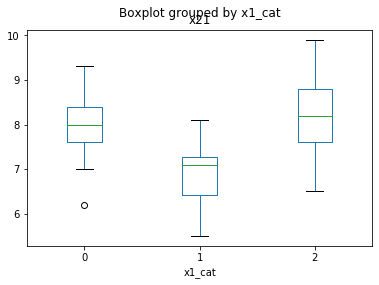

In [21]:
hbat.boxplot(column='x21', by='x1_cat', grid=False)
plt.show()

## Teste de Kruskal-Wallis (quando não há normalidade nos dados)

In [22]:
hbat['x1'] = hbat['x1'].astype('category')
hbat['x1_cat'] = hbat['x1'].cat.codes

kw, p = stats.kruskal(hbat['x19'], hbat['x1_cat'])

print('Kruskal-Wallis')
print('==============')
print('KW value:',kw)
print('p value:',p,'\n')

Kruskal-Wallis
KW value: 151.41957756220566
p value: 8.485614153383154e-35 



### Realizar o teste de Dunn

In [23]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


In [24]:
import scikit_posthocs as sp

In [25]:
lst = [hbat[hbat['x1_cat']==0]['x19'],
hbat[hbat['x1_cat']==1]['x19'],
hbat[hbat['x1_cat']==2]['x19']]

sp.posthoc_dunn(lst,p_adjust='holm')

,1,2,3
1,-1.000000e+00,3.237841e-08,3.081581e-01
2,3.237841e-08,-1.000000e+00,1.559771e-10
3,3.081581e-01,1.559771e-10,-1.000000e+00


## ANOVA two-way - 2 variáveis independentes

In [26]:
#ANOVA two-way
# Calculating effect size

hbat['x1'] = hbat['x1'].astype('category')
hbat['x1_cat'] = hbat['x1'].cat.codes
hbat['x3'] = hbat['x3'].astype('category')
hbat["x3_cat"] = hbat["x3"].cat.codes
hbat['x5'] = hbat['x5'].astype('category')
hbat["x5_cat"] = hbat["x5"].cat.codes

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov


from statsmodels.formula.api import ols
model2 = ols('x19 ~ C(x1_cat) + C(x5_cat)', hbat).fit()

res2 = sm.stats.anova_lm(model2, typ= 2)
anova_table(res2)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(x1_cat),52.976944,26.488472,2.0,51.234931,7.239024e-16,0.424966,0.414951
C(x5_cat),22.052651,22.052651,1.0,42.655011,3.106708e-09,0.176900,0.172039
Residual,49.632024,0.517000,96.0,NaN,NaN,NaN,NaN


In [27]:
#Post-hoc test (Tukey)
mc = MultiComparison(hbat['x19'], hbat['x1_cat'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.5893  0.001 -2.0898 -1.0888   True
     0      2   0.3403 0.2377 -0.1563  0.8368  False
     1      2   1.9295  0.001  1.4219  2.4372   True
----------------------------------------------------


In [28]:
mc = MultiComparison(hbat['x19'], hbat['x3_cat'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.5435 0.0219 -1.0064 -0.0806   True
----------------------------------------------------


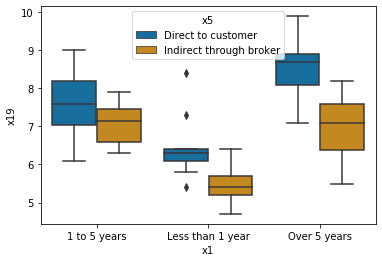

In [29]:
sns.boxplot(y='x19', x='x1', 
                 data=hbat, 
                 palette="colorblind",
                 hue='x5')
plt.show()